<a href="https://colab.research.google.com/github/miamvmian/SciML/blob/main/Seminar_FNO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installing libraries

In [ ]:
!pip install -q numpy h5py matplotlib torch tqdm neuraloperator gdown

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 26.2 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 186.9/186.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 100.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.3/59.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 115.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 753.1/753.1 kB 45.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.5/53.5 kB 3.9 MB/s eta 0:00:00


# Downloading data


Paper: [arxiv.org](https://arxiv.org/abs/2010.08895)

Original dataset from the paper: [drive.google.com](https://drive.google.com/drive/folders/1UnbQh2WWc6knEHbLn-ZaXrKUZhp7pjt-)

## With gdown

trying to download NavierStokes_V1e-3_N5000_T50.zip from the official source

In [ ]:
!gdown "https://drive.google.com/uc?id=1r3idxpsHa21ijhlu3QQ1hVuXcqnBTO7d"

Downloading...
From (original): https://drive.google.com/uc?id=1r3idxpsHa21ijhlu3QQ1hVuXcqnBTO7d
From (redirected): https://drive.google.com/uc?id=1r3idxpsHa21ijhlu3QQ1hVuXcqnBTO7d&confirm=t&uuid=bec99e5d-ac78-4830-8bcb-e147735a2638
To: /content/NavierStokes_V1e-3_N5000_T50.zip
100% 3.85G/3.85G [00:48<00:00, 79.6MB/s]


In [ ]:
!unzip NavierStokes_V1e-3_N5000_T50.zip

Archive:  NavierStokes_V1e-3_N5000_T50.zip
  inflating: ns_V1e-3_N5000_T50.mat  


trying to download NavierStokes_V1e-4_N10000_T30.zip from the official source

In [ ]:
!gdown -q "https://drive.google.com/uc?id=1RmDQQ-lNdAceLXrTGY_5ErvtINIXnpl3"

Traceback (most recent call last):
  File "/usr/local/bin/gdown", line 10, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/gdown/__main__.py", line 172, in main
    download(
  File "/usr/local/lib/python3.12/dist-packages/gdown/download.py", line 368, in download
    for chunk in res.iter_content(chunk_size=CHUNK_SIZE):
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/requests/models.py", line 820, in generate
    yield from self.raw.stream(chunk_size, decode_content=True)
  File "/usr/local/lib/python3.12/dist-packages/urllib3/response.py", line 1091, in stream
    data = self.read(amt=amt, decode_content=decode_content)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/urllib3/response.py", line 980, in read
    data = self._raw_read(amt)
           ^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/u

## With requests from YD

In [ ]:
import requests
import zipfile, io
from urllib.parse import urlencode
from tqdm import tqdm

In [ ]:
def download_file_from_YD(disk_url, filename):
    url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' + urlencode({'public_key': disk_url})
    response = requests.get(url)

    download_url = response.json()['href']
    download_response = requests.get(download_url, stream=True)

    total_size = int(download_response.headers.get("content-length", 0))
    block_size = 1024

    with tqdm(total=total_size, unit="B", unit_scale=True) as progress_bar:
        with open(filename, "wb") as file:
            for data in download_response.iter_content(block_size):
                progress_bar.update(len(data))
                file.write(data)

    if total_size != 0 and progress_bar.n != total_size:
        raise RuntimeError("Could not download file")

In [ ]:
download_file_from_YD(
    disk_url='https://disk.yandex.ru/d/OZxiRwsMLYuXtw',
    filename='ns_V1e-3_N5000_T50.mat'
)

100%|██████████| 3.85G/3.85G [02:24<00:00, 26.6MB/s]


In [ ]:
download_file_from_YD(
    disk_url='https://disk.yandex.ru/d/SFOQ4r7RY0aTaQ',
    filename='ns_V1e-4_N10000_T30.mat'
)

In [ ]:
download_file_from_YD(
    disk_url='https://disk.yandex.ru/d/4i-aiK4xNVmJ-w',
    filename='ns_data_V1e-4_N20_T50_R256test.mat'
)

100%|██████████| 1.05G/1.05G [01:37<00:00, 10.8MB/s]


# Getting started

In [ ]:
import h5py
import torch
import numpy as np
import torch.nn as nn
import matplotlib
import matplotlib.pyplot as plt

from neuralop.models import FNO
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from torch.utils.data import Dataset, DataLoader
from tqdm import tqdm
from scipy.io import loadmat

DEVICE = 'mps'

In [ ]:
file = h5py.File('ns_V1e-3_N5000_T50.mat')

In [ ]:
file['a']

<HDF5 dataset "a": shape (64, 64, 5000), type "<f4">

In [ ]:
file['u']

<HDF5 dataset "u": shape (50, 64, 64, 5000), type "<f4">

In [ ]:
file['t']

<HDF5 dataset "t": shape (50, 1), type "<f4">

# Visualizing samples

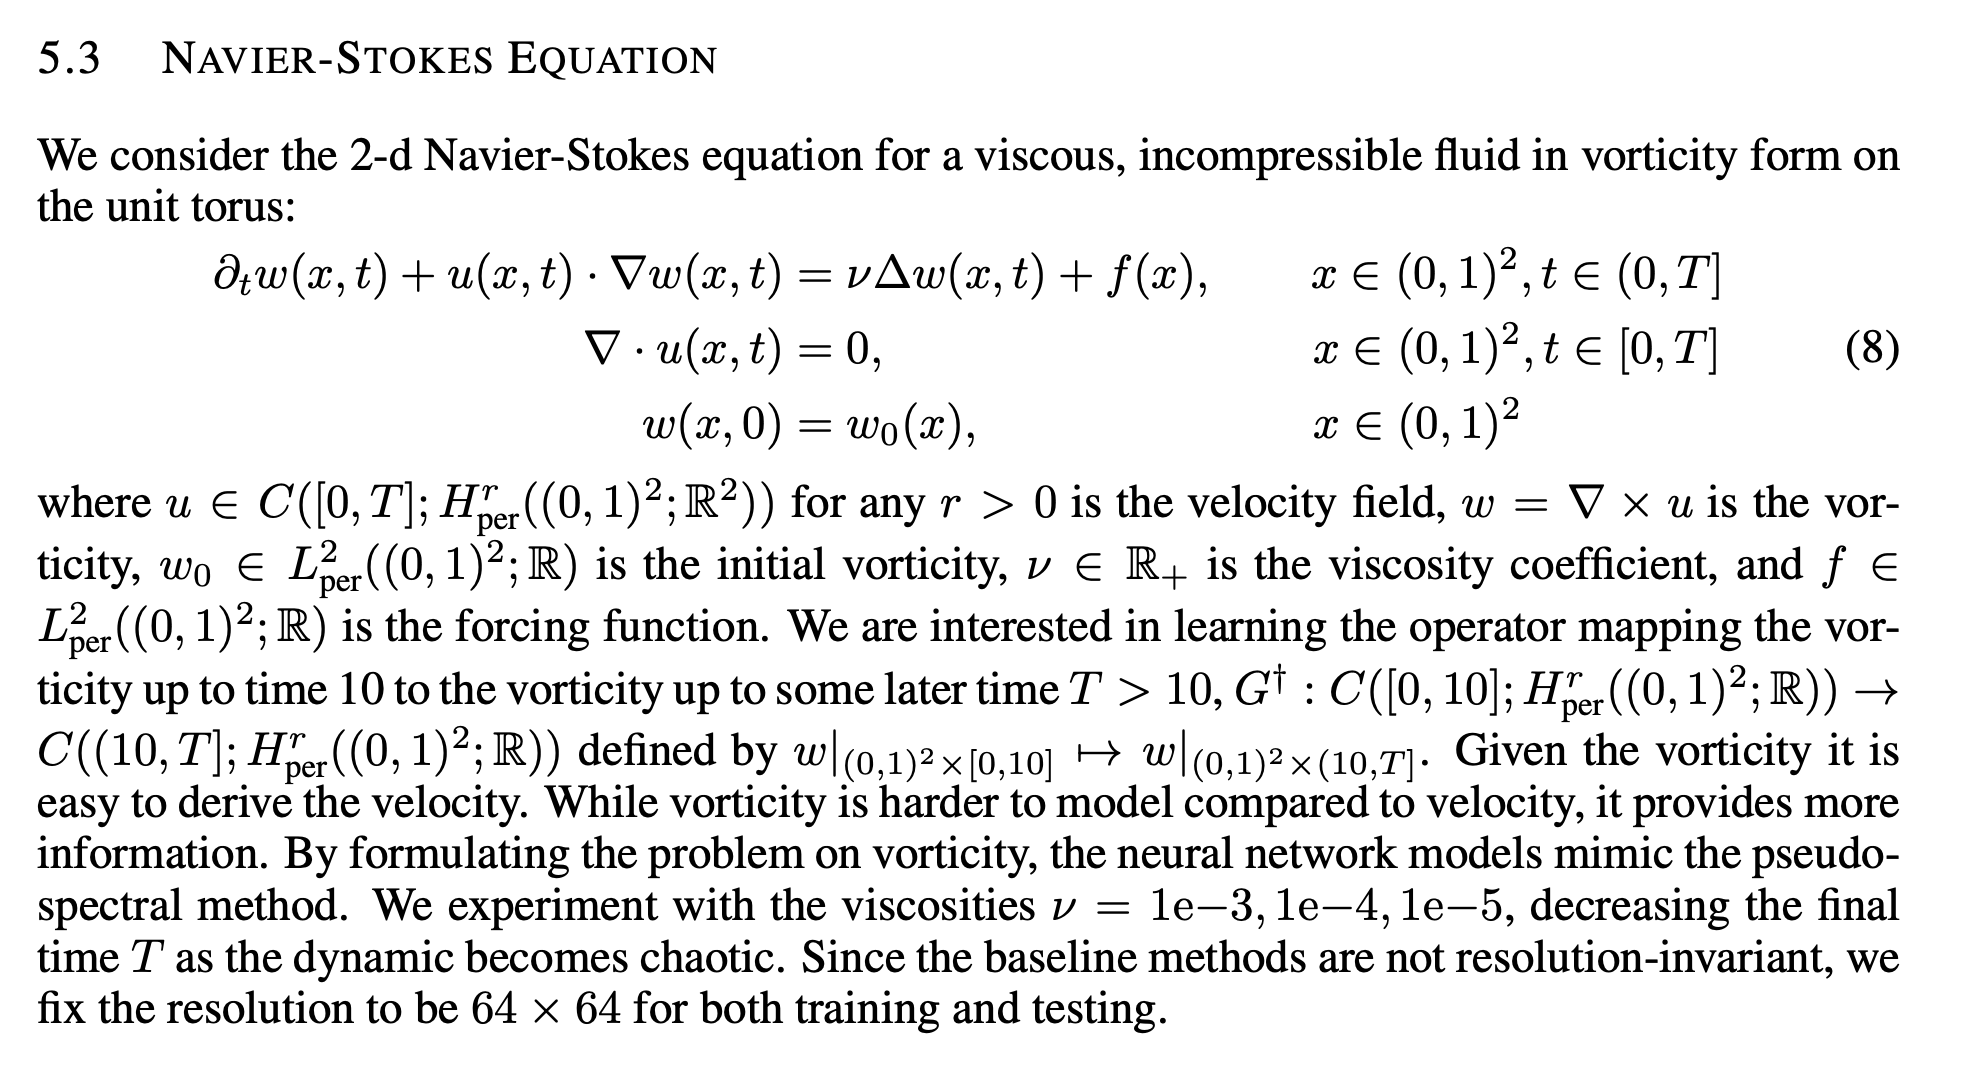

In [ ]:
a = file['a'][:, :, 0]
u = file['u'][:, :, :, 0]

In [ ]:
a.shape

(64, 64)

In [ ]:
import matplotlib

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')

x1 = np.linspace(0, 1, 64)
x2 = np.linspace(0, 1, 64)
x1, x2 = np.meshgrid(x1, x2)

ax1.pcolormesh(x1, x2, a, vmin=-1, vmax=1)
ax1.set_title('a')

sc = ax2.pcolormesh(x1, x2, u[0], vmin=-1, vmax=1)
ax2.set_title('u')
fig.colorbar(sc, ax=ax2, fraction=0.046, pad=0.04)

for ax in (ax1, ax2):
    ax.set_box_aspect(1.0)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])

def animate(i):
    ax2.set_title(f'u, t = {i}')
    ax2.pcolormesh(x1, x2, u[i], vmin=-1, vmax=1)

anim = FuncAnimation(fig, animate, frames=50, blit=False, repeat=True)

# # VS CODE
# anim.save('data.gif')

# COLAB
plt.close()
HTML(anim.to_html5_video())


# Converting into PyTroch Dataset

In [ ]:
class NavierStokesDataset(Dataset):

    def __init__(self, file='ns_V1e-3_N5000_T50.mat', in_channels=10, out_channels=10):
        self.file = h5py.File(file)
        self.u = self.file['u']
        self.in_channels = in_channels
        self.out_channels = out_channels

    def __len__(self):
        return self.u.shape[3]

    def __getitem__(self, idx):
        u_in = torch.from_numpy(self.u[:self.in_channels, :, :, idx])
        u_out = torch.from_numpy(self.u[self.in_channels:self.in_channels+self.out_channels, :, :, idx])
        return u_in, u_out

In [ ]:
in_channels = 10
out_channels = 40

dataset = NavierStokesDataset(in_channels=in_channels, out_channels=out_channels)
u_in, u_out = next(iter(dataset))

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')

ax1.pcolormesh(x1, x2, u_in[0].numpy(), vmin=-1, vmax=1)
ax1.set_title('u_in')

sc = ax2.pcolormesh(x1, x2, u_out[0].numpy(), vmin=-1, vmax=1)
ax2.set_title('u_out')
fig.colorbar(sc, ax=ax2, fraction=0.046, pad=0.04)

for ax in (ax1, ax2):
    ax.set_box_aspect(1.0)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])

def animate(i):
    i_in = min(i, in_channels-1)
    i_out = max(i-in_channels, 0)
    ax1.set_title(f'Model input (t = {i_in + 1})')
    ax1.pcolormesh(x1, x2, u_in[i_in].numpy(), vmin=-1, vmax=1)
    ax2.set_title(f'Model output (t = {i_out + in_channels + 1})')
    ax2.pcolormesh(x1, x2, u_out[i_out].numpy(), vmin=-1, vmax=1)

anim = FuncAnimation(fig, animate, frames=in_channels+out_channels, blit=False, repeat=True)

# # VS CODE
# anim.save('ns_v1e-3.gif)

# COLAB
plt.close()
HTML(anim.to_html5_video())

# Create dataloader

In [ ]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [4000, 1000])
batch_size = 32
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# U-Net Baseline

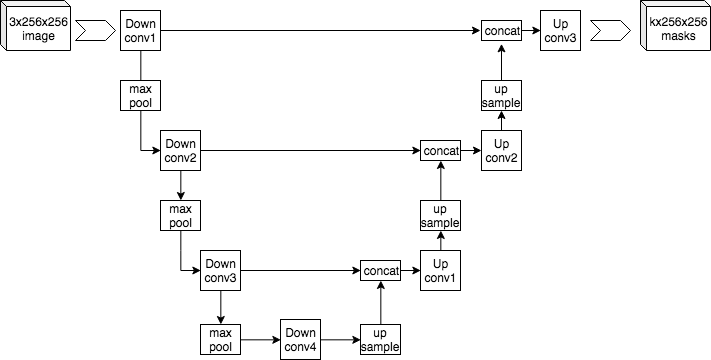

with ResNet Convolutions

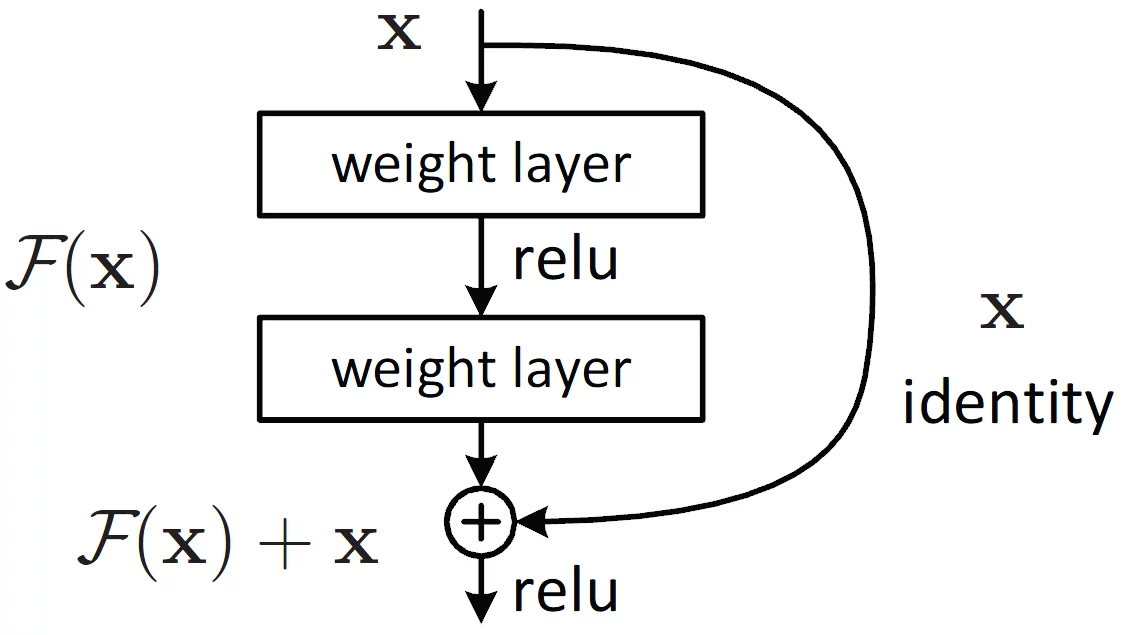

In [ ]:
class ResNetBlock2D(nn.Module):

    def __init__(self, in_channels=32, out_channels=32, dropout=0.01, num_groups=16, kernel_size=(3, 3)):
        super().__init__()

        self.conv = nn.Sequential(
            nn.GroupNorm(num_channels=in_channels, num_groups=num_groups),
            nn.SiLU(),
            nn.Conv2d(
                in_channels, out_channels,
                kernel_size=kernel_size, stride=1, padding='same'
            ),
            nn.GroupNorm(num_channels=out_channels, num_groups=num_groups),
            nn.SiLU(),
            nn.Dropout2d(p=dropout),
            nn.Conv2d(
                out_channels, out_channels,
                kernel_size=kernel_size, stride=1, padding='same'
            )
        )

        if in_channels != out_channels:
            self.conv_shortcut = nn.Conv2d(
                in_channels, out_channels,
                kernel_size=1, stride=1, padding=0
            )
        else:
            self.conv_shortcut = nn.Identity()

    def forward(self, X: torch.Tensor) -> torch.Tensor:
        hidden_states = self.conv(X)
        hidden_states = hidden_states + self.conv_shortcut(X)
        return hidden_states

In [ ]:
class Unet2D(nn.Module):
    def __init__(
        self, in_channels=3, out_channels=3,
        block_out_channels=[16, 16],
        num_groups=16, dropout=0.01, scales_w=[2], scales_h=[2], scales_d=[2], kernel_sizes=[(3, 3), (3, 3), (3, 3)]
    ):
        super().__init__()

        self.conv_in = nn.Conv2d(
            in_channels=in_channels,
            out_channels=block_out_channels[0],
            kernel_size=kernel_sizes[0],
            stride=1,
            padding=1
        )

        self.contracting = nn.Sequential()

        self.expansive = nn.Sequential()

        self.conv_out = nn.Conv2d(
            in_channels=block_out_channels[0],
            out_channels=out_channels,
            kernel_size=kernel_sizes[0],
            stride=1,
            padding=1
        )

        for i in range(len(block_out_channels) - 1):
            self.contracting.append(
                ResNetBlock2D(
                    in_channels=block_out_channels[i],
                    out_channels=block_out_channels[i+1],
                    num_groups=num_groups, dropout=dropout,
                    kernel_size=kernel_sizes[i+1]
                )
            )
            self.contracting.append(
                nn.MaxPool2d(
                    kernel_size=[
                        scales_w[i],
                        scales_h[i],
                    ],
                    stride=[
                        scales_w[i],
                        scales_h[i],
                    ]
                )
            )

            self.expansive.append(
                nn.Upsample(
                    scale_factor=(
                        scales_w[::-1][i],
                        scales_h[::-1][i],
                    )
                )
            )
            self.expansive.append(
                ResNetBlock2D(
                    in_channels=block_out_channels[::-1][i]*2,
                    out_channels=block_out_channels[::-1][i+1],
                    num_groups=num_groups, dropout=dropout,
                    kernel_size=kernel_sizes[::-1][i+1]
                )
            )


    def forward(self, X):
        X = self.conv_in(X)
        X_skips = list()
        for block in self.contracting:
            X = block(X)
            if isinstance(block, ResNetBlock2D):
                X_skips.append(X)
        i = 0
        for block in self.expansive:
            if isinstance(block, ResNetBlock2D):
                X = block(torch.cat([X, X_skips[::-1][i]], dim=1))
                i = i + 1
            else:
                X = block(X)
        X = self.conv_out(X)
        return X


In [ ]:
unet = Unet2D(
    in_channels=in_channels,
    out_channels=out_channels,
    block_out_channels=[32, 64, 128, 256],
    scales_w=[2, 2, 2],
    scales_h=[2, 2, 2],
    scales_d=[2, 2, 2],
    kernel_sizes=5*[(3, 3)]
)

In [ ]:
unet

Unet2D(
  (conv_in): Conv2d(10, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (contracting): Sequential(
    (0): ResNetBlock2D(
      (conv): Sequential(
        (0): GroupNorm(16, 32, eps=1e-05, affine=True)
        (1): SiLU()
        (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): GroupNorm(16, 64, eps=1e-05, affine=True)
        (4): SiLU()
        (5): Dropout2d(p=0.01, inplace=False)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
      (conv_shortcut): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (2): ResNetBlock2D(
      (conv): Sequential(
        (0): GroupNorm(16, 64, eps=1e-05, affine=True)
        (1): SiLU()
        (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): GroupNorm(16, 128, eps=1e-05, affine=True)
        (4): SiLU()
        (5): Dropout2d(p

In [ ]:
total_params = sum(p.numel() for p in unet.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 2277992


In [ ]:
u_in, u_out = next(iter(train_dataloader))

In [ ]:
u_in.shape, u_out.shape

(torch.Size([32, 10, 64, 64]), torch.Size([32, 40, 64, 64]))

In [ ]:
def r2(y_true, y_pred):
    mse = torch.mean(torch.square(y_true - y_pred), dim=(1, 2, 3))
    var = torch.var(y_true, dim=(1, 2, 3), correction=0)
    result = 1 - mse / var
    return torch.median(result).item()

In [ ]:
def train_model(model, train_dataloader, test_dataloader, n_epochs=3, device=DEVICE):
    model = model.to(device)
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-6)
    loss = nn.MSELoss()

    for epoch in range(n_epochs):
        print(f'Epoch: {epoch + 1}')
        print('Training ...')

        train_scores = list()
        model.train()
        for u_in, u_out in tqdm(train_dataloader):
            u_in = u_in.to(device)
            u_out = u_out.to(device)
            u_hat = model(u_in)
            loss_value = loss(u_hat, u_out)
            train_scores.append(r2(u_out, u_hat))
            optimizer.zero_grad()
            loss_value.backward()
            optimizer.step()
        train_score = np.mean(train_scores)
        print(f'Train R2: {train_score:.2f}')
        print('Validation ...')

        val_scores = list()
        model.eval()
        with torch.inference_mode():
            for u_in, u_out in tqdm(test_dataloader):
                u_in = u_in.to(device)
                u_out = u_out.to(device)
                u_hat = model(u_in)
                val_scores.append(r2(u_out, u_hat))
        val_score = np.mean(val_scores)
        print(f'Test R2: {val_score:.2f}')

In [ ]:
train_model(unet, train_dataloader, test_dataloader, n_epochs=10, device='cuda')

Epoch: 1
Training ...


  2%|▏         | 2/125 [00:29<30:12, 14.73s/it]


KeyboardInterrupt: 

In [ ]:
unet.load_state_dict(torch.load('unet_ep100_ns1e-3.pth', 'cpu'))

<All keys matched successfully>

In [ ]:
def get_predictions(model, dataloader, device=DEVICE):
    model = model.to(device)
    model.eval()
    with torch.inference_mode():
        u_real = list()
        u_pred = list()
        for u_in, u_out in tqdm(dataloader):
            u_in = u_in.to(device)
            u_out = u_out.to(device)
            u_hat = model(u_in)
            u_real.append(u_out)
            u_pred.append(u_hat)
        u_real = torch.vstack(u_real).detach().cpu().numpy()
        u_pred = torch.vstack(u_pred).detach().cpu().numpy()
    return u_real, u_pred

In [ ]:
def plot_predictions(u_real, u_pred, n=0):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), layout='constrained')

    real = u_real[n, :, :, :]
    pred = u_pred[n, :, :, :]
    diff = real - pred

    sc = ax1.pcolormesh(x1, x2, real[0], vmin=-1, vmax=1)
    ax2.pcolormesh(x1, x2, pred[0], vmin=-1, vmax=1)
    fig.colorbar(sc, ax=ax2, fraction=0.046, pad=0.04)
    sc = ax3.pcolormesh(x1, x2, diff[0], vmin=-0.5, vmax=0.5, cmap='bwr')
    fig.colorbar(sc, ax=ax3, fraction=0.046, pad=0.04)

    for ax in (ax1, ax2, ax3):
        ax.set_box_aspect(1.0)
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_xticks([0, 0.5, 1])
        ax.set_yticks([0, 0.5, 1])

    def animate(i):
        ax1.set_title(f'Real u out (t = {i+10})')
        ax1.pcolormesh(x1, x2, real[i], vmin=-1, vmax=1)
        ax2.set_title(f'Pred u out (t = {i+10})')
        ax2.pcolormesh(x1, x2, pred[i], vmin=-1, vmax=1)
        ax3.set_title(f'Diff (t = {i+10})')
        ax3.pcolormesh(x1, x2, diff[i], vmin=-1, vmax=1, cmap='bwr')

    anim = FuncAnimation(fig, animate, frames=out_channels, blit=False, repeat=True)

    return anim

In [ ]:
u_real, u_pred_unet = get_predictions(unet, test_dataloader, device='cpu')

100%|██████████| 32/32 [01:41<00:00,  3.17s/it]


MovieWriter ffmpeg unavailable; using Pillow instead.


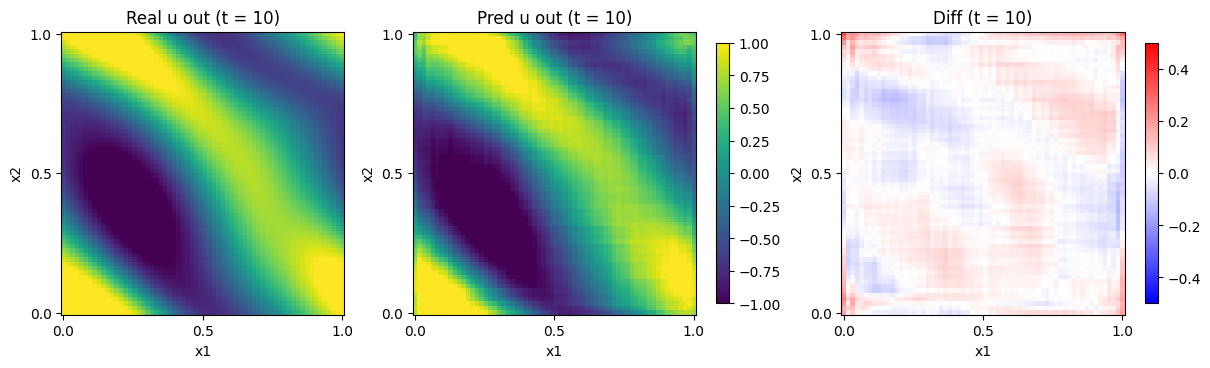

In [ ]:
n = 0
anim = plot_predictions(u_real, u_pred_unet, n=n)
anim.save(f'unet_v1e-3_{n}.gif')

# Loading FNO

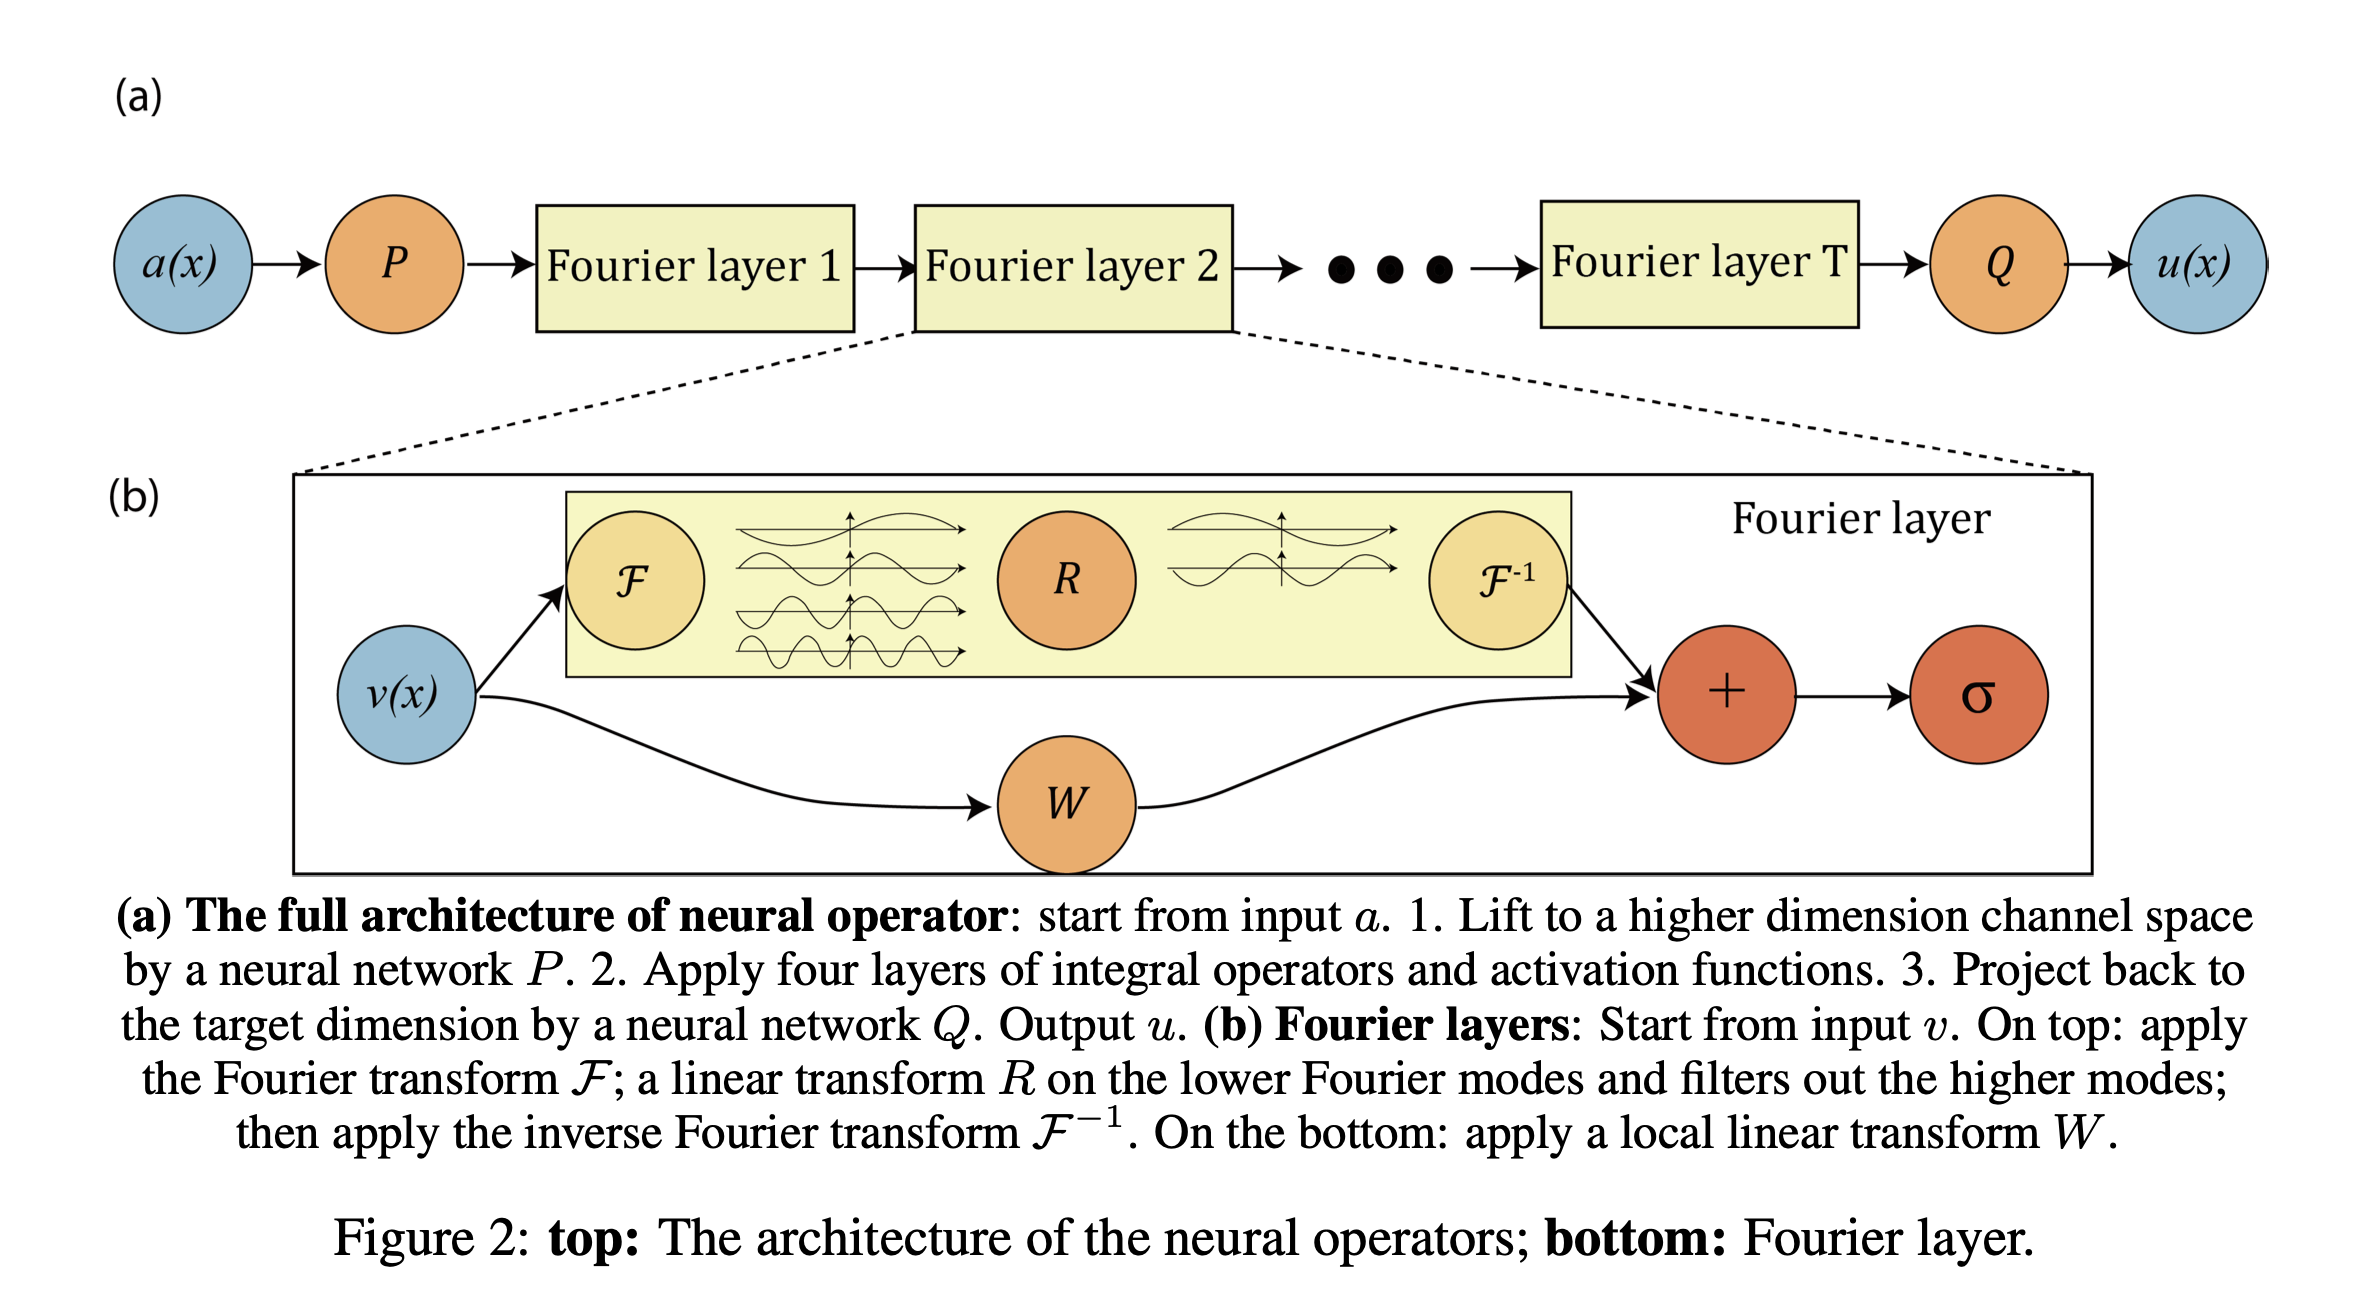

In [ ]:
fno = FNO(
    n_modes=(16, 16),
    hidden_channels=64,
    in_channels=in_channels,
    out_channels=out_channels,
    positional_embedding=None
)

total_params = sum(p.numel() for p in fno.parameters())
print(f"Total number of parameters: {total_params}")

Total number of parameters: 2416104


In [ ]:
train_model(fno, train_dataloader, test_dataloader, n_epochs=5, device=DEVICE)

Epoch: 1
Training ...


  0%|          | 0/125 [00:00<?, ?it/s]/Users/gshutov/work/tsiml/.venv/lib/python3.9/site-packages/tltorch/factorized_tensors/factorized_tensors.py:66: UserWarning: Using a non-tuple sequence for multidimensional indexing is deprecated and will be changed in pytorch 2.9; use x[tuple(seq)] instead of x[seq]. In pytorch 2.9 this will be interpreted as tensor index, x[torch.tensor(seq)], which will result either in an error or a different result (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/python_variable_indexing.cpp:312.)
  return self.__class__(self.tensor[indices])
/Users/gshutov/work/tsiml/.venv/lib/python3.9/site-packages/neuralop/layers/spectral_convolution.py:468: UserWarning: Using a non-tuple sequence for multidimensional indexing is deprecated and will be changed in pytorch 2.9; use x[tuple(seq)] instead of x[seq]. In pytorch 2.9 this will be interpreted as tensor index, x[torch.tensor(seq)], which will result either in an error or a d

Train R2: 0.13
Validation ...


100%|██████████| 32/32 [00:08<00:00,  3.64it/s]


Test R2: 0.41
Epoch: 2
Training ...


100%|██████████| 125/125 [00:37<00:00,  3.33it/s]


Train R2: 0.57
Validation ...


100%|██████████| 32/32 [00:08<00:00,  3.92it/s]


Test R2: 0.69
Epoch: 3
Training ...


100%|██████████| 125/125 [00:37<00:00,  3.34it/s]


Train R2: 0.74
Validation ...


100%|██████████| 32/32 [00:08<00:00,  3.93it/s]


Test R2: 0.77
Epoch: 4
Training ...


100%|██████████| 125/125 [00:37<00:00,  3.35it/s]


Train R2: 0.79
Validation ...


100%|██████████| 32/32 [00:08<00:00,  3.97it/s]


Test R2: 0.80
Epoch: 5
Training ...


100%|██████████| 125/125 [00:37<00:00,  3.30it/s]


Train R2: 0.82
Validation ...


100%|██████████| 32/32 [00:08<00:00,  3.78it/s]

Test R2: 0.85


In [ ]:
u_real, u_pred = get_predictions(fno, test_dataloader, device='mps')

  0%|          | 0/32 [00:00<?, ?it/s]/Users/gshutov/work/tsiml/.venv/lib/python3.9/site-packages/tltorch/factorized_tensors/factorized_tensors.py:66: UserWarning: Using a non-tuple sequence for multidimensional indexing is deprecated and will be changed in pytorch 2.9; use x[tuple(seq)] instead of x[seq]. In pytorch 2.9 this will be interpreted as tensor index, x[torch.tensor(seq)], which will result either in an error or a different result (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/python_variable_indexing.cpp:312.)
  return self.__class__(self.tensor[indices])
/Users/gshutov/work/tsiml/.venv/lib/python3.9/site-packages/neuralop/layers/spectral_convolution.py:468: UserWarning: Using a non-tuple sequence for multidimensional indexing is deprecated and will be changed in pytorch 2.9; use x[tuple(seq)] instead of x[seq]. In pytorch 2.9 this will be interpreted as tensor index, x[torch.tensor(seq)], which will result either in an error or a di

In [ ]:
u_pred.shape, u_real.shape

((1000, 40, 64, 64), (1000, 40, 64, 64))

MovieWriter ffmpeg unavailable; using Pillow instead.


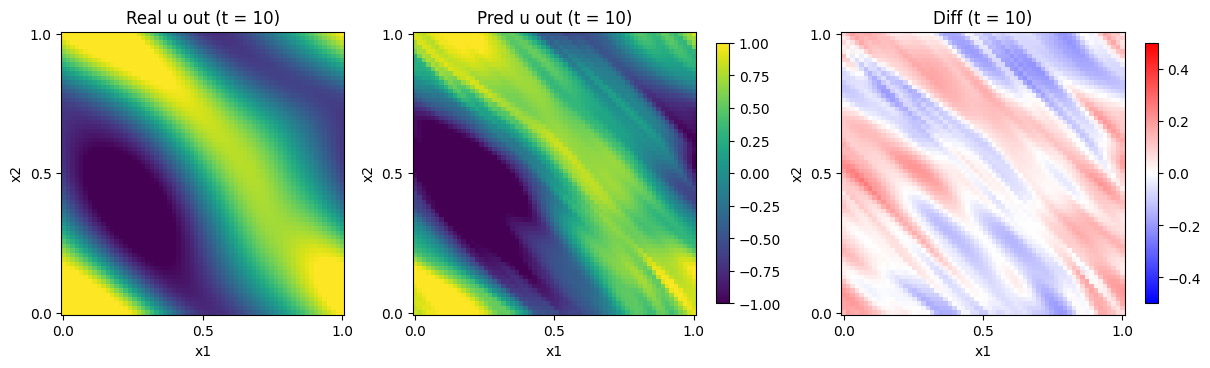

In [ ]:
anim = plot_predictions(u_real, u_pred)
anim.save(f'fno_v1e-3_{n}.gif')

# Another dataset with $\nu=10^{-4}$

In [ ]:
in_channels = 10
out_channels = 20
dataset = NavierStokesDataset(
    'ns_V1e-4_N10000_T30.mat',
    in_channels=in_channels,
    out_channels=out_channels
)

train_dataset, test_dataset = torch.utils.data.random_split(dataset, [8000, 2000])
batch_size = 128
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [ ]:
u_in, u_out = next(iter(dataset))

x1 = np.linspace(0, 1, 64)
x2 = np.linspace(0, 1, 64)
x1, x2 = np.meshgrid(x1, x2)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), layout='constrained')

ax1.pcolormesh(x1, x2, u_in[0].numpy(), vmin=-1, vmax=1)
ax1.set_title('u_in')

sc = ax2.pcolormesh(x1, x2, u_out[0].numpy(), vmin=-1, vmax=1)
ax2.set_title('u_out')
fig.colorbar(sc, ax=ax2, fraction=0.046, pad=0.04)

for ax in (ax1, ax2):
    ax.set_box_aspect(1.0)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])

def animate(i):
    i_in = min(i, in_channels-1)
    i_out = max(i-in_channels, 0)
    ax1.set_title(f'Model input (t = {i_in + 1})')
    ax1.pcolormesh(x1, x2, u_in[i_in].numpy(), vmin=-1, vmax=1)
    ax2.set_title(f'Model output (t = {i_out + in_channels + 1})')
    ax2.pcolormesh(x1, x2, u_out[i_out].numpy(), vmin=-1, vmax=1)

anim = FuncAnimation(fig, animate, frames=in_channels+out_channels, blit=False, repeat=True)
# plt.close()
anim.save('ns_v1e-4.gif', writer=matplotlib.animation.PillowWriter())
plt.close()

In [ ]:
unet = Unet2D(
    in_channels=in_channels,
    out_channels=out_channels,
    block_out_channels=[32, 64, 128, 256],
    scales_w=[2, 2, 2],
    scales_h=[2, 2, 2],
    scales_d=[2, 2, 2],
    kernel_sizes=5*[(3, 3)]
)

In [ ]:
unet.load_state_dict(torch.load('unet_ep100_ns1e-4.pth', DEVICE, weights_only=False))

<All keys matched successfully>

In [ ]:
unet

Unet2D(
  (conv_in): Conv2d(10, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (contracting): Sequential(
    (0): ResNetBlock2D(
      (conv): Sequential(
        (0): GroupNorm(16, 32, eps=1e-05, affine=True)
        (1): SiLU()
        (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): GroupNorm(16, 64, eps=1e-05, affine=True)
        (4): SiLU()
        (5): Dropout2d(p=0.01, inplace=False)
        (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=same)
      )
      (conv_shortcut): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    )
    (1): MaxPool2d(kernel_size=[2, 2], stride=[2, 2], padding=0, dilation=1, ceil_mode=False)
    (2): ResNetBlock2D(
      (conv): Sequential(
        (0): GroupNorm(16, 64, eps=1e-05, affine=True)
        (1): SiLU()
        (2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=same)
        (3): GroupNorm(16, 128, eps=1e-05, affine=True)
        (4): SiLU()
        (5): Dropout2d(p

In [ ]:
# train_model(unet, train_dataloader, test_dataloader, n_epochs=5, device=DEVICE)

In [ ]:
u_real, u_pred = get_predictions(unet, test_dataloader, device='mps')

100%|██████████| 16/16 [00:14<00:00,  1.07it/s]


In [ ]:
L2_UNET = np.mean(np.square(u_real - u_pred), axis=(1, 2, 3))
n = np.argmin(L2_UNET)
n

np.int64(1070)

MovieWriter ffmpeg unavailable; using Pillow instead.


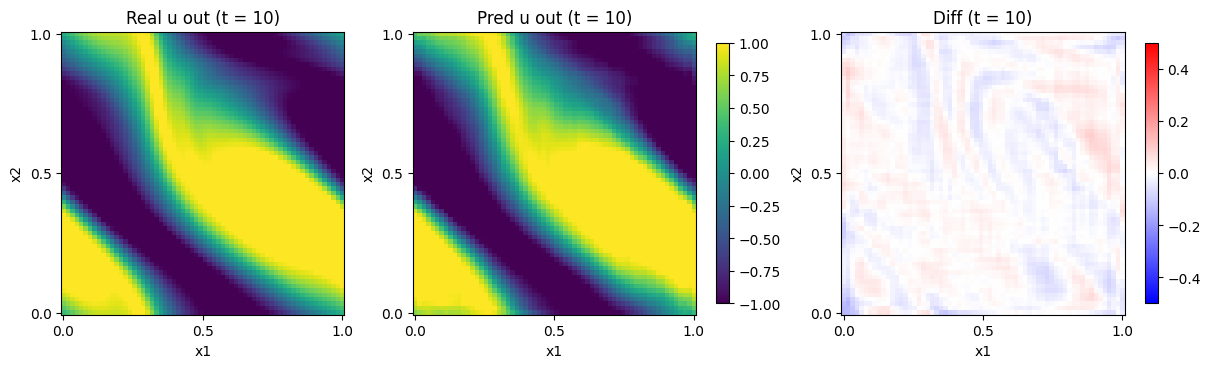

In [ ]:
anim = plot_predictions(u_real, u_pred, n=n)
anim.save(f'unet_v1e-4_{n}.gif')

In [ ]:
fno = FNO(
    n_modes=(16, 16),
    hidden_channels=64,
    in_channels=in_channels,
    out_channels=out_channels,
    positional_embedding=None
)

In [ ]:
fno.load_state_dict(torch.load('fno_ep100_ns1e-4.pth', DEVICE, weights_only=False))

<All keys matched successfully>

In [ ]:
# train_model(fno, train_dataloader, test_dataloader, n_epochs=5, device=DEVICE)

In [ ]:
u_real, u_pred = get_predictions(fno, test_dataloader, device='mps')

  0%|          | 0/16 [00:00<?, ?it/s]/Users/gshutov/work/tsiml/.venv/lib/python3.9/site-packages/tltorch/factorized_tensors/factorized_tensors.py:66: UserWarning: Using a non-tuple sequence for multidimensional indexing is deprecated and will be changed in pytorch 2.9; use x[tuple(seq)] instead of x[seq]. In pytorch 2.9 this will be interpreted as tensor index, x[torch.tensor(seq)], which will result either in an error or a different result (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/autograd/python_variable_indexing.cpp:312.)
  return self.__class__(self.tensor[indices])
/Users/gshutov/work/tsiml/.venv/lib/python3.9/site-packages/neuralop/layers/spectral_convolution.py:468: UserWarning: Using a non-tuple sequence for multidimensional indexing is deprecated and will be changed in pytorch 2.9; use x[tuple(seq)] instead of x[seq]. In pytorch 2.9 this will be interpreted as tensor index, x[torch.tensor(seq)], which will result either in an error or a di

In [ ]:
L2_FNO = np.mean(np.square(u_real - u_pred), axis=(1, 2, 3))
n = np.argmin(L2_FNO)
n

np.int64(1070)

MovieWriter ffmpeg unavailable; using Pillow instead.


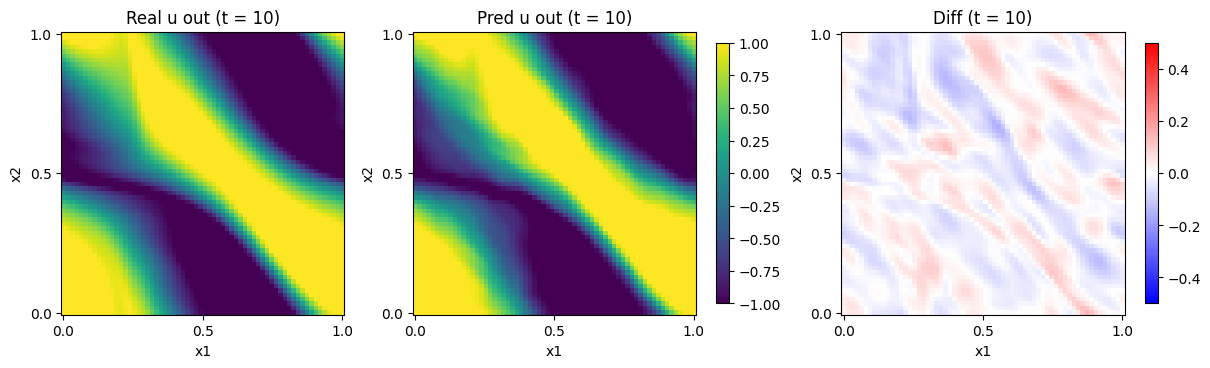

In [ ]:
anim = plot_predictions(u_real, u_pred, n=n)
anim.save(f'fno_v1e-4_{n}.gif')

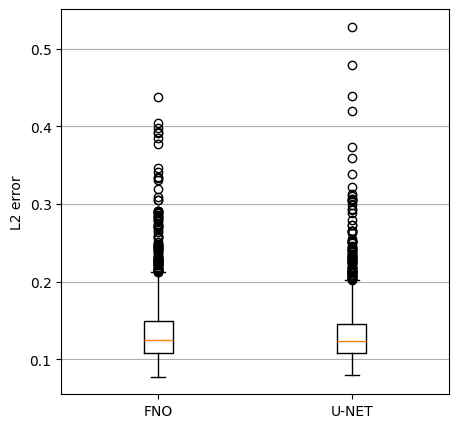

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.boxplot([L2_FNO, L2_UNET])
# ax.set_yscale('log')
ax.set_ylabel('L2 error')
ax.set_xticks([1, 2], ['FNO', 'U-NET'])
ax.grid(axis='y')

# Introducing Larger Dataset

In [ ]:
u = loadmat('ns_data_V1e-4_N20_T50_R256test.mat')['u']
u = np.transpose(u, (0, 3, 1, 2))
u = torch.from_numpy(u).to(DEVICE)

In [ ]:
fno = fno.to(DEVICE)
with torch.inference_mode():
    u_in = u[:16, :10]
    u_pred = fno(u_in)
    u_real = u[:16, 10:30]
    u_pred = u_pred.detach().cpu().numpy()
    u_real = u_real.detach().cpu().numpy()
L2_FNO_ = np.mean(np.square(u_real - u_pred), axis=(1, 2, 3))

In [ ]:
n = 0

MovieWriter ffmpeg unavailable; using Pillow instead.


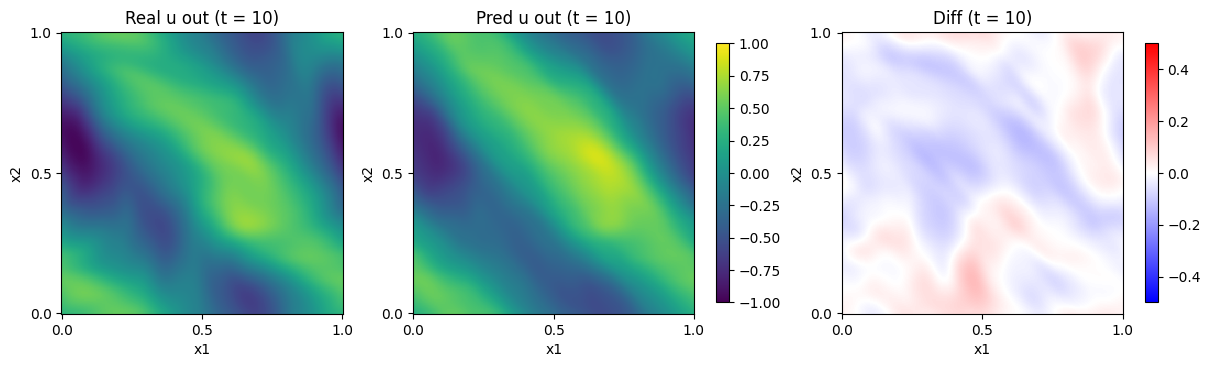

In [ ]:
x1 = np.linspace(0, 1, 256)
x2 = np.linspace(0, 1, 256)
x1, x2 = np.meshgrid(x1, x2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), layout='constrained')

real = u_real[n, :, :, :]
pred = u_pred[n, :, :, :]
diff = real - pred

sc = ax1.pcolormesh(x1, x2, real[0], vmin=-1, vmax=1)
ax2.pcolormesh(x1, x2, pred[0], vmin=-1, vmax=1)
fig.colorbar(sc, ax=ax2, fraction=0.046, pad=0.04)
sc = ax3.pcolormesh(x1, x2, diff[0], vmin=-0.5, vmax=0.5, cmap='bwr')
fig.colorbar(sc, ax=ax3, fraction=0.046, pad=0.04)

for ax in (ax1, ax2, ax3):
    ax.set_box_aspect(1.0)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])

def animate(i):
    ax1.set_title(f'Real u out (t = {i+10})')
    ax1.pcolormesh(x1, x2, real[i], vmin=-1, vmax=1)
    ax2.set_title(f'Pred u out (t = {i+10})')
    ax2.pcolormesh(x1, x2, pred[i], vmin=-1, vmax=1)
    ax3.set_title(f'Diff (t = {i+10})')
    ax3.pcolormesh(x1, x2, diff[i], vmin=-1, vmax=1, cmap='bwr')

anim = FuncAnimation(fig, animate, frames=10, blit=False, repeat=True)
anim.save(f'fno_v1e-4_{n}_large.gif')

In [ ]:
unet = unet.to(DEVICE)
with torch.inference_mode():
    u_in = u[:16, :10]
    u_pred = unet(u_in)
    u_real = u[:16, 10:30]
    u_pred = u_pred.detach().cpu().numpy()
    u_real = u_real.detach().cpu().numpy()

L2_UNET_ = np.mean(np.square(u_real - u_pred), axis=(1, 2, 3))


MovieWriter ffmpeg unavailable; using Pillow instead.


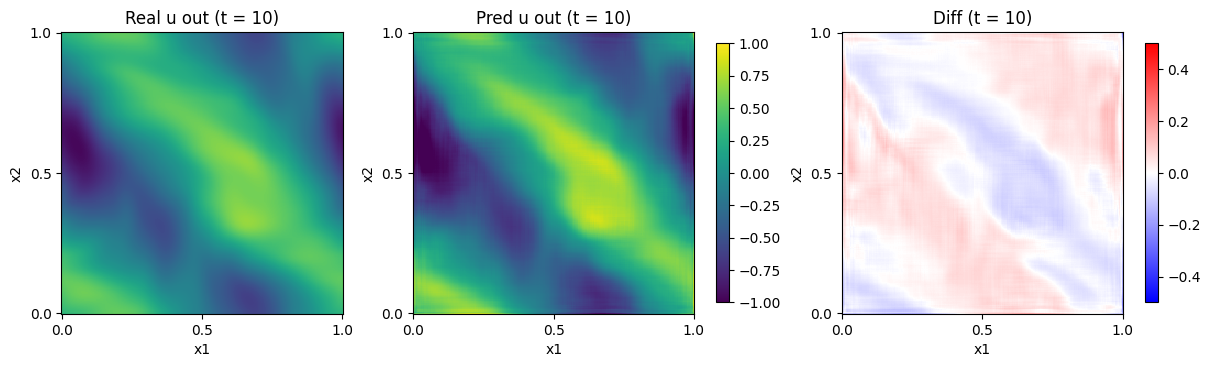

In [ ]:
x1 = np.linspace(0, 1, 256)
x2 = np.linspace(0, 1, 256)
x1, x2 = np.meshgrid(x1, x2)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4), layout='constrained')

real = u_real[n, :, :, :]
pred = u_pred[n, :, :, :]
diff = real - pred

sc = ax1.pcolormesh(x1, x2, real[0], vmin=-1, vmax=1)
ax2.pcolormesh(x1, x2, pred[0], vmin=-1, vmax=1)
fig.colorbar(sc, ax=ax2, fraction=0.046, pad=0.04)
sc = ax3.pcolormesh(x1, x2, diff[0], vmin=-0.5, vmax=0.5, cmap='bwr')
fig.colorbar(sc, ax=ax3, fraction=0.046, pad=0.04)

for ax in (ax1, ax2, ax3):
    ax.set_box_aspect(1.0)
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([0, 0.5, 1])

def animate(i):
    ax1.set_title(f'Real u out (t = {i+10})')
    ax1.pcolormesh(x1, x2, real[i], vmin=-1, vmax=1)
    ax2.set_title(f'Pred u out (t = {i+10})')
    ax2.pcolormesh(x1, x2, pred[i], vmin=-1, vmax=1)
    ax3.set_title(f'Diff (t = {i+10})')
    ax3.pcolormesh(x1, x2, diff[i], vmin=-1, vmax=1, cmap='bwr')

anim = FuncAnimation(fig, animate, frames=10, blit=False, repeat=True)
anim.save(f'unet_v1e-4_{n}_large.gif')

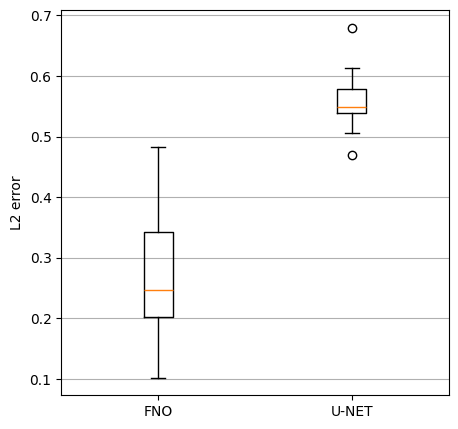

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.boxplot([L2_FNO_, L2_UNET_])
# ax.set_yscale('log')
ax.set_ylabel('L2 error')
ax.set_xticks([1, 2], ['FNO', 'U-NET'])
ax.grid(axis='y')